In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Markdown

In [103]:
data = pd.read_csv("./data_lr9.csv")
data.head()

,Минимальная зарплата,Максимальная зарплата,Доля работников нарастающим итогом. % (у)
0,16242.0,16242.0,0.1
1,16242.1,18680.0,0.3
2,18680.1,19490.0,0.4
3,19490.1,20300.0,0.5
4,20300.1,21110.0,0.6


---
## Лабораторная работа №9

В таблице 1 представлены сведения о распределении доли работников организаций по размеру заработной платы в 2023 г.

In [104]:
X = (data["Максимальная зарплата"] + data["Минимальная зарплата"])/2
X.name = 'Средняя зарплата'

X = X.values
y = data['Доля работников нарастающим итогом. % (у)'].values

<Axes: >

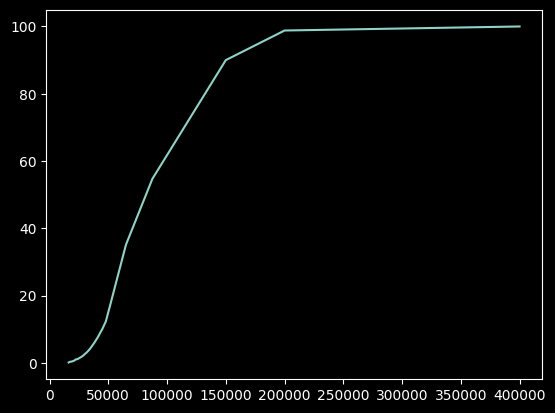

In [105]:
sns.lineplot(x=X, y=y)

1. С использованием эмпирических данных определить значения $у=F(x)$ (доля работников нарастающим итогом, %) с шагом $10 000$ руб. на интервале от 0 до 1 000 000 руб. Построить график функции распределения $F(x)$.

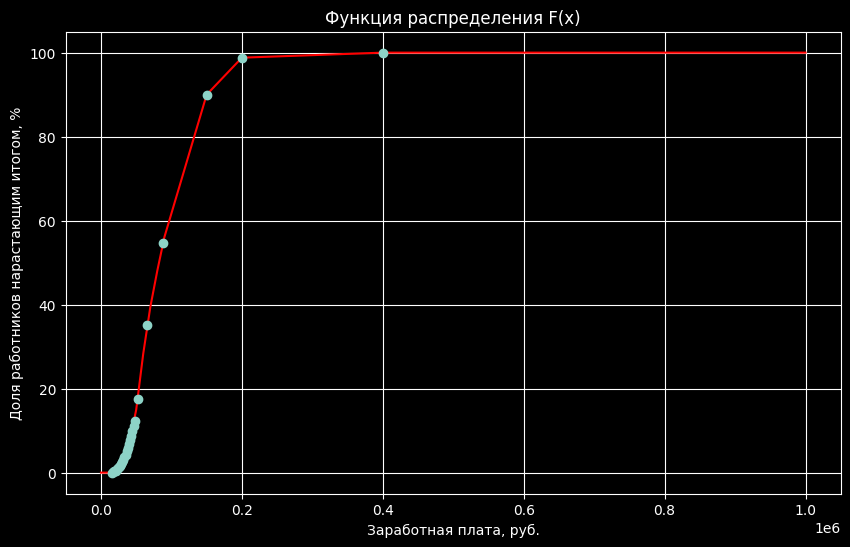

In [106]:
# Функция интерполяции
def interpolate(x_points, y_points):
    def wrap(x):
        return np.interp(x, x_points, y_points)

    return wrap


F = interpolate(X, y)

# Определяем значения x с шагом 10 000 руб
x = np.arange(0, 1000001, 10000)
Fx = F(x)
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x, Fx, linestyle="-", c="r")
plt.plot(X, y, marker='o', linestyle='')
plt.xlabel("Заработная плата, руб.")
plt.ylabel("Доля работников нарастающим итогом, %")
plt.title("Функция распределения F(x)")
plt.grid(True)
plt.show()

2. Вычислить значения производной функции распределения $F’(x)=f(x)$ с шагом $10 000$ руб. на интервале от 0 до 1 000 000 руб. Построить график функции плотности распределения $f(x)$.

In [107]:
def diff2point(x, fx):
    return (fx[1:] - fx[:-1]) / (x[1:] - x[:-1])

<Axes: >

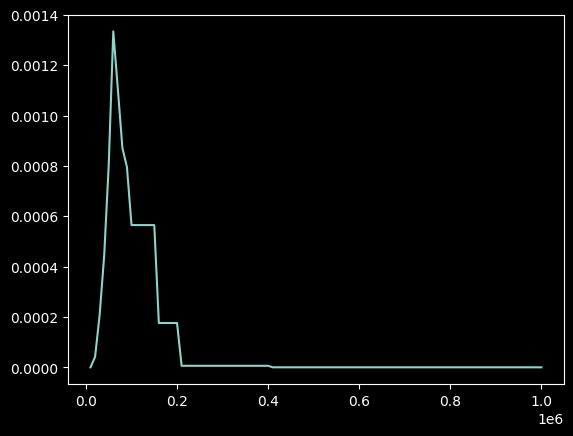

In [108]:
fx = diff2point(x, Fx)
sns.lineplot(x=x[1:], y=fx)



3. Рассчитайте среднюю ошибку аппроксимации  $F’(x)=f(x)$  (определить f(x) при исходных х) исходных данных Δy. Улучшите метрику путем корректировки интерполяционного полинома. 

<Axes: >

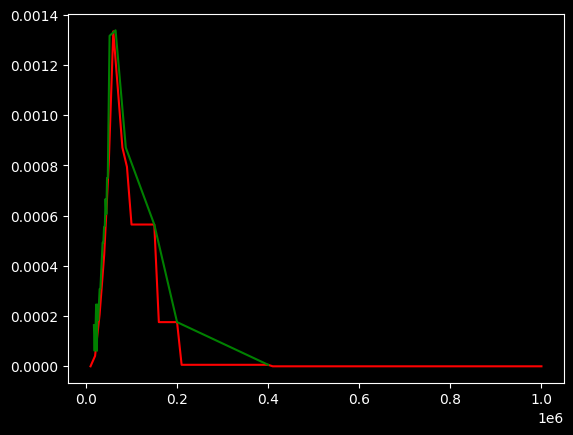

In [109]:
Fx_diff = diff2point(X, y)

sns.lineplot(x=x[1:], y=fx, c="r")
sns.lineplot(x=X[1:], y=Fx_diff, c="g")

In [110]:
# Найдем значение функции fx в точнах x_new
Fx_diff_interp = interpolate(X[1:], Fx_diff)(x)

In [111]:
# Найдем погрешность
np.mean(abs(Fx_diff_interp[1:] - fx))

4.545943042478219e-05

4. Вычислите вероятности следующих событий методом прямоугольников, методом трапеций, методом парабол:
    1) размер заработной платы случайного работника составляет менее $50,0$ тыс. руб.;
    2) размер заработной платы случайного работника находится в интервале от $50,0$ тыс. руб. до $100,0$ тыс. руб.;
    3) размер заработной платы случайного работника лежит в интервале $\hat х \pm σ$; $\hat х \pm 2σ$; $\hat х \pm 3σ$. Сформулировать выводы в терминах теории вероятностей. 

5. Оценить погрешность метода прямоугольников, метода трапеций, метода парабол для каждого события

1) размер заработной платы случайного работника составляет менее $50,0$ тыс. руб.

In [112]:
def rectangle_method(f, start, end, parts=100):
    """
    Метод прямоугольников для определенного интегралла
    """
    x = np.linspace(start, end, parts, endpoint=True)
    d = x[1] - x[0]
    y = f(x)
    return sum(y * d)


def trapezoid_method(f, start, end, parts=100):
    """
    Метод трапеций для определенного интегралла
    """
    x = np.linspace(start, end, parts, endpoint=True)
    d = x[1] - x[0]
    y = f(x)
    return sum((y[1:] + y[:-1]) / 2 * d)


def parabaloid_method(f, start, end, parts=100):
    """
    Метод парабол для определенного интегралла
    """
    x = np.linspace(start, end, parts + 1, endpoint=True)
    fx = f(x)

    integral = fx[0] + fx[-1] + sum(fx[1::2] * 4) + sum(fx[2:-1:2] * 2)

    return integral * (end - start) / parts / 3

In [113]:
# f = interpolate(X[1:], Fx_diff)
def f(x):
    return diff2point(x, F(x))

In [114]:
def error(I_h, I_h2, p):
    return abs((I_h2 - I_h) / (2**p - 1))

In [131]:
def all_methods(f, start, end):
    methods = [rectangle_method, trapezoid_method, parabaloid_method]
    di_ = {
        "Методы": ["Прямоугольников", "Трапеций", "Парабол"],
        "Значения": [f"{m(f, start, end, 100):.2f} %" for m in methods],
        "Погрешность": [
            error(m(f, start, end, 100), m(f, start, end, 200), p)
            for m, p in zip(methods, (2, 2, 4))
        ],
    }
    display(Markdown(pd.DataFrame(di_).to_markdown(index=False)))


2) размер заработной платы случайного работника находится в интервале от $50,0$ тыс. руб. до $100,0$ тыс. руб.;

In [132]:
all_methods(f, 50_000, 100_000)

| Методы          | Значения   |   Погрешность |
|:----------------|:-----------|--------------:|
| Прямоугольников | 46.70 %    |   1.18424e-14 |
| Трапеций        | 46.22 %    |   0.0795753   |
| Парабол         | 46.52 %    |   0.00757864  |

3) размер заработной платы случайного работника лежит в интервале\
$\bar{х} \pm \sigma$; $\bar{х} \pm 2\sigma$; $\bar{х} \pm 3\sigma$

In [133]:
pr = np.hstack([y[0], y[1:] - y[:-1]]) / 100

x_hat = sum(pr * X)

std = (sum(pr*X**2) - sum(pr*X)**2)**0.5
x_hat, std


(111262.18955, 59745.58318204919)

$\bar х \pm \sigma$

In [135]:
sigma1_lims = x_hat-std, x_hat+std
all_methods(f, *sigma1_lims)

| Методы          | Значения   |   Погрешность |
|:----------------|:-----------|--------------:|
| Прямоугольников | 76.64 %    |   7.57912e-14 |
| Трапеций        | 75.73 %    |   0.153087    |
| Парабол         | 75.97 %    |   0.0207921   |

$\bar х \pm 2\sigma$

In [136]:
sigma2_lims = x_hat - 2*std, x_hat + 2*std
all_methods(f, *sigma2_lims)


| Методы          | Значения   |   Погрешность |
|:----------------|:-----------|--------------:|
| Прямоугольников | 98.88 %    |   1.89478e-14 |
| Трапеций        | 98.88 %    |   0.00121305  |
| Парабол         | 98.89 %    |   0.0116329   |

$\bar х \pm 3\sigma$

In [137]:
sigma3_lims = x_hat - 3 * std, x_hat + 3 * std
all_methods(f, *sigma3_lims)


| Методы          | Значения   |   Погрешность |
|:----------------|:-----------|--------------:|
| Прямоугольников | 99.24 %    |   4.73695e-14 |
| Трапеций        | 99.23 %    |   0.00181957  |
| Парабол         | 98.63 %    |   0.0630029   |